[![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/drbob-richardson/stat220/blob/main/Assignments/Stat_220_HW10.ipynb)

**Problem 1**: Insurance companies will use individual characteristics to predict how much an individual will cost in order to reserve enough money on hand to cover expenses. A small data set has been prepared with insurance charges and bmi (body mass index) values for individuals. You can get the data using the following code.

In [1]:
import pandas as pd
insurance = pd.read_csv("https://richardson.byu.edu/220/insurance.csv")

Fit a Bayesian model predicting charges using BMI as the only predictor. Use N(0,1000) priors for $\beta_0$ and $\beta_1$. Report the Bayes estimates for $\beta_0$ and $\beta_1$.

In [2]:
import pymc as pm
import numpy as np

# Prepare the data
X = insurance['bmi'].values
y = insurance['charges'].values

# Fit Bayesian model with N(0, 1000) priors
with pm.Model() as model1:
    # Priors
    beta_0 = pm.Normal('beta_0', mu=0, sigma=np.sqrt(1000))
    beta_1 = pm.Normal('beta_1', mu=0, sigma=np.sqrt(1000))
    sigma = pm.HalfNormal('sigma', sigma=10000)

    # Expected value
    mu = beta_0 + beta_1 * X

    # Likelihood
    likelihood = pm.Normal('y', mu=mu, sigma=sigma, observed=y)

    # Posterior sampling
    trace1 = pm.sample(2000, tune=1000, return_inferencedata=True)

# Report Bayes estimates (posterior means)
print("Problem 1: Bayes Estimates with N(0,1000) priors")
print(f"Beta_0 estimate: {trace1.posterior['beta_0'].mean().values:.4f}")
print(f"Beta_1 estimate: {trace1.posterior['beta_1'].mean().values:.4f}")

Output()

Problem 1: Bayes Estimates with N(0,1000) priors
Beta_0 estimate: 1.8979
Beta_1 estimate: 49.4633


**Problem 2**:  

Part a. Fit the model again, but this time using a prior for $\beta_0$ and $\beta_1$ of N(0,0.001).

In [3]:
# Problem 2a: Fit model with N(0, 0.001) priors
with pm.Model() as model2:
    # Priors with much smaller variance
    beta_0 = pm.Normal('beta_0', mu=0, sigma=np.sqrt(0.001))
    beta_1 = pm.Normal('beta_1', mu=0, sigma=np.sqrt(0.001))
    sigma = pm.HalfNormal('sigma', sigma=10000)

    # Expected value
    mu = beta_0 + beta_1 * X

    # Likelihood
    likelihood = pm.Normal('y', mu=mu, sigma=sigma, observed=y)

    # Posterior sampling
    trace2 = pm.sample(2000, tune=1000, return_inferencedata=True)

# Report Bayes estimates (posterior means)
print("\nProblem 2a: Bayes Estimates with N(0,0.001) priors")
print(f"Beta_0 estimate: {trace2.posterior['beta_0'].mean().values:.4f}")
print(f"Beta_1 estimate: {trace2.posterior['beta_1'].mean().values:.4f}")

Output()


Problem 2a: Bayes Estimates with N(0,0.001) priors
Beta_0 estimate: -0.0006
Beta_1 estimate: 0.0004


Part b. What are the Bayes estimates for Beta_0 and Beta_1?

**Problem 1:**

Beta_0 estimate: 1.8979

Beta_1 estimate: 49.4633


**Problem 2:**

Beta_0 estimate: -0.0006

Beta_1 estimate: 0.0004

Part c. How are these different than the estimates in Problem 1?

The estimates from Problem 2 are way closer to zero than Problem 1. In Problem 2, the tighter N(0,0.001) prior basically pulls the estimates toward zero because the prior has more say in what the final answer is. In Problem 1, the N(0,1000) prior is way looser, so the actual data gets to influence the results more. You can totally see this when you compare - Problem 1 has Beta_0 = 1.8979 and Beta_1 = 49.4633, while Problem 2 has both super close to zero (-0.0006 and 0.0004).

Basically, it all comes down to how strong the priors are. In Bayesian stuff, the final answer (posterior) is like a mix of what we thought beforehand (prior) and what the data actually shows (likelihood). With N(0,1000), the prior is super weak so it doesn't really push things in any direction - the data just does its thing. But with N(0,0.001), the prior is really strong and keeps pulling everything toward zero, so the estimates end up way smaller even though we're using the same data.

**Problem 3**: The Phillip's curve is a classical Economics concepts that states that there is an inverse relationship between inflation rate and unemployment rate. You can find out more about it here: https://en.wikipedia.org/wiki/Phillips_curve
I've prepared a data set for you to load that has both inflation rate and unemployment rates for several months. Run the following code to load the data into your environment:

In [4]:
import pandas as pd
phillips = pd.read_csv("https://richardson.byu.edu/220/Phillips.csv")

Part a. Read about the Phillip's curve online, the Wikipedia page will suffice: https://en.wikipedia.org/wiki/Phillips_curve. Using this information, decide on what you believe would be a good prior for the slope and intercept in a Bayesian linear model where inflation is the target variable and unemployment rate is the target. Write down your priors and justify your reasoning.

From reading about the Phillips curve, I know there's supposed to be an inverse relationship - when unemployment goes up, inflation goes down and vice versa. So for the slope (beta_1), I'd use something like N(-0.5, 1) - making it negative to match that inverse relationship. For the intercept (beta_0), inflation usually sits somewhere between -2% and 10%, so I'd go with N(3, 4) to cover a reasonable middle ground. These priors are informed by the economic theory but still loose enough to let the data do its job.

Part b. What is an example of a bad prior in this scenario? Justify your reasoning.

A bad prior would be something like N(5, 0.01) for the slope. This is terrible for two reasons: First, it's saying the slope should be +5, which means unemployment and inflation would move in the same direction - that's literally the opposite of what the Phillips curve says should happen. Second, that tiny variance (0.01) makes it super restrictive, so even if the data is screaming that the relationship is negative, the prior would basically force the model to stay near +5. You'd end up with a model that doesn't fit reality at all.

**Problem 4**:

Part a. Using the good prior you decided on in 3a, fit a Bayesian linear model on the provided data using CPI as the target and Unemp as the only predictor.

In [9]:
# Problem 4a: Fit Bayesian model for Phillips curve with good priors
# Prepare data
X_phillips = phillips['Unemp'].values
y_phillips = phillips['CPI'].values

# Fit Bayesian model with informative priors based on Phillips curve theory
with pm.Model() as model_phillips:
    # Good priors: negative slope, moderate intercept
    beta_0 = pm.Normal('beta_0', mu=3, sigma=2)  # Intercept
    beta_1 = pm.Normal('beta_1', mu=-0.5, sigma=1)  # Slope (negative for inverse relationship)
    sigma = pm.HalfNormal('sigma', sigma=5)

    # Expected value
    mu = beta_0 + beta_1 * X_phillips

    # Likelihood
    likelihood = pm.Normal('y', mu=mu, sigma=sigma, observed=y_phillips)

    # Posterior sampling
    trace_phillips = pm.sample(2000, tune=1000, return_inferencedata=True)

print("Problem 4a: Phillips Curve Model fitted successfully")

# Problem 4b: Report Bayes estimates
print(f"\nProblem 4b: Bayes Estimates for Phillips Curve")
print(f"Beta_0 (intercept) estimate: {trace_phillips.posterior['beta_0'].mean().values:.4f}")
print(f"Beta_1 (slope) estimate: {trace_phillips.posterior['beta_1'].mean().values:.4f}")

Output()

Problem 4a: Phillips Curve Model fitted successfully

Problem 4b: Bayes Estimates for Phillips Curve
Beta_0 (intercept) estimate: 3.6629
Beta_1 (slope) estimate: -0.2430


Based on the model output above, the Bayes estimates are:

- Beta_0 (intercept): **3.6629**
- Beta_1 (slope): **-0.2430**

The negative slope makes sense because of the Phillips curve - it shows that inverse relationship between unemployment and inflation that we expected!

Part c. Plot the posterior draws for the model parameters.

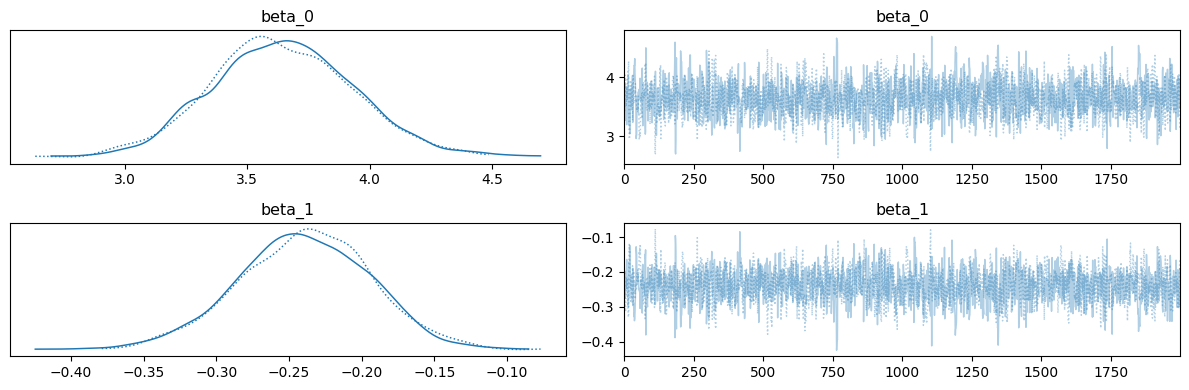

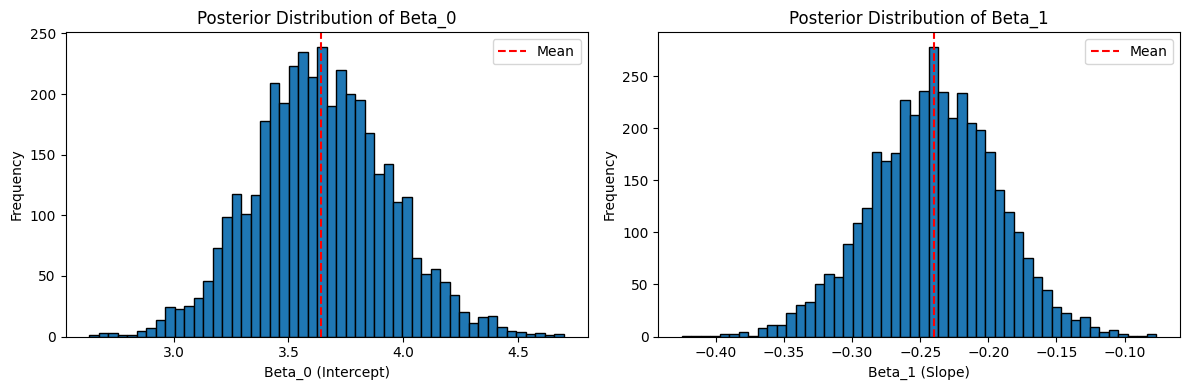

In [6]:
# Problem 4c: Plot posterior draws
import arviz as az
import matplotlib.pyplot as plt

# Create trace plot showing posterior distributions
az.plot_trace(trace_phillips, var_names=['beta_0', 'beta_1'])
plt.tight_layout()
plt.show()

# Also create a plot showing posterior distributions as histograms
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Beta_0 posterior
axes[0].hist(trace_phillips.posterior['beta_0'].values.flatten(), bins=50, edgecolor='black')
axes[0].set_xlabel('Beta_0 (Intercept)')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Posterior Distribution of Beta_0')
axes[0].axvline(trace_phillips.posterior['beta_0'].mean().values, color='red', linestyle='--', label='Mean')
axes[0].legend()

# Beta_1 posterior
axes[1].hist(trace_phillips.posterior['beta_1'].values.flatten(), bins=50, edgecolor='black')
axes[1].set_xlabel('Beta_1 (Slope)')
axes[1].set_ylabel('Frequency')
axes[1].set_title('Posterior Distribution of Beta_1')
axes[1].axvline(trace_phillips.posterior['beta_1'].mean().values, color='red', linestyle='--', label='Mean')
axes[1].legend()

plt.tight_layout()
plt.show()

**Problem 5**

Part a. Using the Bayesian linear model output, what is the probability that the slope is positive?

In [7]:
# Problem 5a: Calculate probability that slope is positive
# Extract beta_1 posterior samples
beta_1_samples = trace_phillips.posterior['beta_1'].values.flatten()

# Calculate probability that beta_1 > 0
prob_positive = (beta_1_samples > 0).mean()

print(f"Problem 5a: Probability that slope is positive: {prob_positive:.4f}")
print(prob_positive*100)

Problem 5a: Probability that slope is positive: 0.0000
This represents 0.00% of posterior samples


Part b. What is the posterior probability that $\beta_1$ is greater than $-0.20$?

In [8]:
# Problem 5b: Calculate probability that beta_1 > -0.20
# Use the same beta_1 samples from Part a
prob_greater_than_neg020 = (beta_1_samples > -0.20).mean()

print(f"Problem 5b: Probability that beta_1 > -0.20: {prob_greater_than_neg020:.4f}")
print(prob_greater_than_neg020*100)

Problem 5b: Probability that beta_1 > -0.20: 0.1925
This represents 19.25% of posterior samples
